In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

In [2]:
# Load the Iris dataset
data = load_iris()

In [3]:
# Get feature values of first observation
print(data.data[0])

[5.1 3.5 1.4 0.2]


In [4]:
# Get feature names
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# Get target value of first observation
print(data.target[0])

0


In [6]:
# Get target name of first observation
print(data.target_names[data.target[0]])

setosa


In [7]:
# Get minimum feature values
print(np.min(data.data, axis = 0))

[4.3 2.  1.  0.1]


In [8]:
# Get maximum feature values
print(np.max(data.data, axis = 0))

[7.9 4.4 6.9 2.5]


In [9]:
# Get unique target values
print(np.unique(data.target))

[0 1 2]


In [10]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.2, 
                                                    random_state = 3)

In [11]:
# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# One hot encode target values
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()

In [22]:
# Initialize neural network object and fit object - attempt 1

fitness_curve = mlrose.NeuralNetwork(hidden_nodes = [2], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3,curve=True)
print(fitness_curve)

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[2],
              learning_rate=0.0001, max_iters=1000)


In [14]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.45


In [15]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.5333333333333333


In [20]:
# Initialize neural network object and fit object - attempt 2
nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', 
                                 algorithm = 'gradient_descent', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model2.fit(X_train_scaled, y_train_hot)
fitness_curve = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', 
                                 algorithm = 'gradient_descent', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)
print(fitness_curve)

NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[2],
              learning_rate=0.0001, max_iters=1000)


In [17]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.625


In [18]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.5666666666666667


In [4]:
print(curve)

(array([4, 0, 2, 0, 0]), 0.0, array([ -7.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,
        -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,
        -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,
        -0.,  -8.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,
        -0.,  -0.,  -7.,  -7.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,
        -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,
        -0.,  -0.,  -0.,  -0., -11.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,
        -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,
        -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,
        -0.,  -0.,  -0.,  -0.,  -0.]))


In [5]:
aneal = [ -7.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,
        -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,
        -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,
        -0.,  -8.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,
        -0.,  -0.,  -7.,  -7.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,
        -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,
        -0.,  -0.,  -0.,  -0., -11.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,
        -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,
        -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,  -0.,
        -0.,  -0.,  -0.,  -0.,  -0.]

length_aneal = len(aneal)
print(length_aneal)

104


In [6]:
size = np.arange(1,length_aneal+1,1)


In [7]:
print(size)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104]


In [8]:

add1 = np.ones(length_aneal)
add100 = add1*100
#addoptimal = add1*17.34261754766733
#aneal1 = np.array(aneal) + np.array(addoptimal)+ np.array(add100)
aneal1 = np.array(aneal)+ np.array(add100)
#print(anealaccuracy)


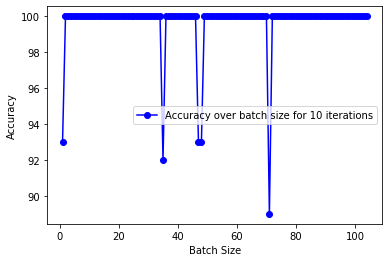

In [9]:
plt.plot(size,aneal1,'b-o',label='Accuracy over batch size for 10 iterations');
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()